**Name: Naman Jain**

**UNI: nj2387**

In [1]:
!pip install tf-nightly-2.0-preview

In [2]:
import tensorflow as tf

Limited tf.compat.v2.summary API due to missing TensorBoard installation
Limited tf.summary API due to missing TensorBoard installation


In [3]:
print("You have version", tf.__version__)
assert tf.__version__ >= "2.0" # TensorFlow ≥ 2.0 required

You have version 2.0.0-dev20190214


In [0]:
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [0]:
BATCH_SIZE = 128
BUFFER_SIZE = len(train_images)

fashion_mnist_train = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
fashion_mnist_test = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(BATCH_SIZE)

# Deep Neural Model Definition 

In [0]:
class DeepModel(Model):
  def __init__(self):
    super().__init__()
    self.flatten = Flatten()
    self.d1 = Dense(256, activation='relu')
    self.d2 = Dense(256, activation='relu')
    self.d3 = Dense(128, activation='relu')
    self.d4 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    x = self.d3(x)
    return self.d4(x)

# Linear Model Definition

In [0]:
class LinearModel(Model):
  def __init__(self):
    super().__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

In [0]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
test_loss_metric = tf.keras.metrics.Mean(name='test_loss')

train_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
def train_step(model, images, labels):
  with tf.GradientTape() as tape:    
    # Forward pass
    predictions = model(images)
    train_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Backward pass
  gradients = tape.gradient(train_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Record results
  train_loss_metric(train_loss)
  train_accuracy_metric(labels, predictions)

In [0]:
def test_step(model, images, labels):
  predictions = model(images)
  test_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Record results
  test_loss_metric(test_loss)
  test_accuracy_metric(labels, predictions)

In [0]:
def train_model(model, EPOCHS=10):

  train_acc = []
  test_acc = []
  train_loss = []
  test_loss = []

  for epoch in range(EPOCHS):
    for images, labels in fashion_mnist_train:
      train_step(model, images, labels)

    for test_images, test_labels in fashion_mnist_test:
      test_step(model, test_images, test_labels)

    template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}, Test loss: {:.4f}, Test accuracy: {:.2f}'
    train_acc.append(train_accuracy_metric.result() * 100)
    test_acc.append(test_accuracy_metric.result() * 100)
    train_loss.append(train_loss_metric.result())
    test_loss.append(test_loss_metric.result())
    print (template.format(epoch +1, 
                           train_loss_metric.result(), 
                           train_accuracy_metric.result() * 100, 
                           test_loss_metric.result(), 
                           test_accuracy_metric.result() * 100))
  return train_acc, train_loss, test_acc, test_loss

In [0]:
def plot_train_val_acc(acc, val_acc, loss, val_loss):
  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

Linear Model Execution....
Epoch 1, Loss: 0.7539, Accuracy: 75.21, Test loss: 0.5693, Test accuracy: 80.85
Epoch 2, Loss: 0.6351, Accuracy: 79.01, Test loss: 0.5402, Test accuracy: 81.67
Epoch 3, Loss: 0.5815, Accuracy: 80.68, Test loss: 0.5224, Test accuracy: 82.17
Epoch 4, Loss: 0.5492, Accuracy: 81.68, Test loss: 0.5100, Test accuracy: 82.49
Epoch 5, Loss: 0.5270, Accuracy: 82.36, Test loss: 0.5008, Test accuracy: 82.75
Epoch 6, Loss: 0.5105, Accuracy: 82.87, Test loss: 0.4936, Test accuracy: 82.96
Epoch 7, Loss: 0.4976, Accuracy: 83.27, Test loss: 0.4878, Test accuracy: 83.13
Epoch 8, Loss: 0.4872, Accuracy: 83.59, Test loss: 0.4830, Test accuracy: 83.27
Epoch 9, Loss: 0.4786, Accuracy: 83.85, Test loss: 0.4789, Test accuracy: 83.39
Epoch 10, Loss: 0.4712, Accuracy: 84.07, Test loss: 0.4755, Test accuracy: 83.49


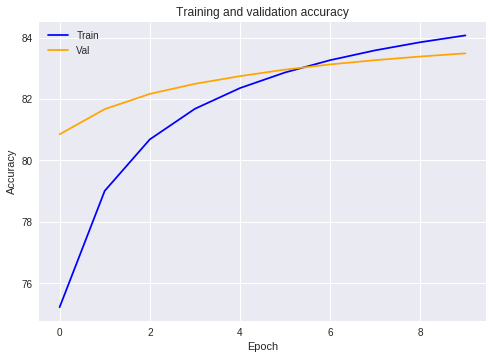

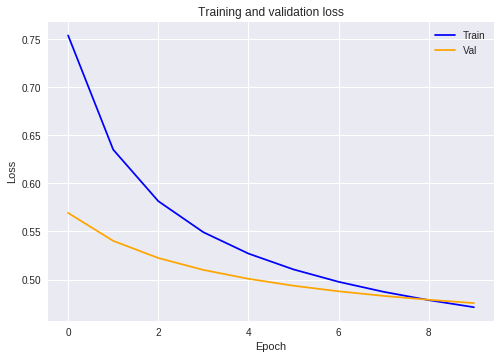

In [15]:
print('Linear Model Execution....')
model_linear = LinearModel()
acc, loss, val_acc, val_loss = train_model(model_linear)
plot_train_val_acc(acc, val_acc, loss, val_loss)

In [18]:
print('Deep Model Execution.....')
model_deep = DeepModel()
acc, loss, val_acc, val_loss = train_model(model_deep)

Deep Model Execution.....
Epoch 1, Loss: 0.3512, Accuracy: 87.47, Test loss: 0.3960, Test accuracy: 86.15
Epoch 2, Loss: 0.3509, Accuracy: 87.46, Test loss: 0.3949, Test accuracy: 86.18
Epoch 3, Loss: 0.3496, Accuracy: 87.50, Test loss: 0.3935, Test accuracy: 86.22
Epoch 4, Loss: 0.3477, Accuracy: 87.55, Test loss: 0.3921, Test accuracy: 86.25
Epoch 5, Loss: 0.3454, Accuracy: 87.63, Test loss: 0.3910, Test accuracy: 86.29
Epoch 6, Loss: 0.3428, Accuracy: 87.71, Test loss: 0.3897, Test accuracy: 86.33
Epoch 7, Loss: 0.3399, Accuracy: 87.80, Test loss: 0.3884, Test accuracy: 86.37
Epoch 8, Loss: 0.3369, Accuracy: 87.90, Test loss: 0.3877, Test accuracy: 86.41
Epoch 9, Loss: 0.3339, Accuracy: 88.00, Test loss: 0.3869, Test accuracy: 86.45
Epoch 10, Loss: 0.3307, Accuracy: 88.10, Test loss: 0.3863, Test accuracy: 86.50
